<a href="https://colab.research.google.com/github/yuzzaf/Course-Machine-Learning/blob/main/Week%206/k%20means%20clustering%20using%20mall%20custumers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### NIM: 1103200082
### Name: Muhammad Yuzzaf Ibrahim Azzumarafi
### Class: TK-44-06

Berikut adalah beberapa metrik evaluasi yang umum digunakan dalam clustering:
1. Inertia: Seperti yang sudah dibahas sebelumnya, inertia mengukur seberapa padat klaster tersebut.
Semakin rendah inertia, semakin baik model clustering.
2. Silhouette Score: Silhouette score mengukur seberapa baik setiap sampel ditempatkan dalam klasternya sendiri dibandingkan dengan klaster lain. Nilai silhouette score berkisar dari -1 hingga 1.
Nilai yang lebih tinggi menunjukkan clustering yang lebih baik.
3. Davies-Bouldin Index (DBI): DBl mengukur seberapa baik klaster telah dipisahkan satu sama lain.
Nilai DBl yang lebih rendah menunjukkan clustering yang lebih baik.
4. Calinski-Harabasz Index: Indeks ini mengevaluasi kualitas clustering berdasarkan seberapa padat dan terpisah klaster tersebut. Nilai yang lebih tinggi menunjukkan clustering yang lebih baik.

In [4]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score

# Ganti path dengan lokasi dataset Anda di Google Drive setelah mounting
file_path = "/content/drive/MyDrive/Dataset/Mall_Customers.csv"

# Membaca dataset ke dalam dataframe
df = pd.read_csv(file_path)

# Menampilkan beberapa baris pertama dari dataframe
print(df.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [6]:
# Mengubah nama atribut dalam dataframe
df = df.rename(columns={'Annual Income (k$)': 'Annual Income', 'Spending Score (1-100)': 'Spending Score'})
# Menampilkan informasi dataframe setelah perubahan]
print(df.head())

   CustomerID  Gender  Age  Annual Income  Spending Score
0           1    Male   19             15              39
1           2    Male   21             15              81
2           3  Female   20             16               6
3           4  Female   23             16              77
4           5  Female   31             17              40


In [7]:
# Menghapus kolom "Customer ID" dan "Gender" dari dataframe
df = df.drop(['CustomerID', 'Gender'], axis=1)
# Menampilkan informasi dataframe setelah penghapusan kolom
print(df.head())

   Age  Annual Income  Spending Score
0   19             15              39
1   21             15              81
2   20             16               6
3   23             16              77
4   31             17              40


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

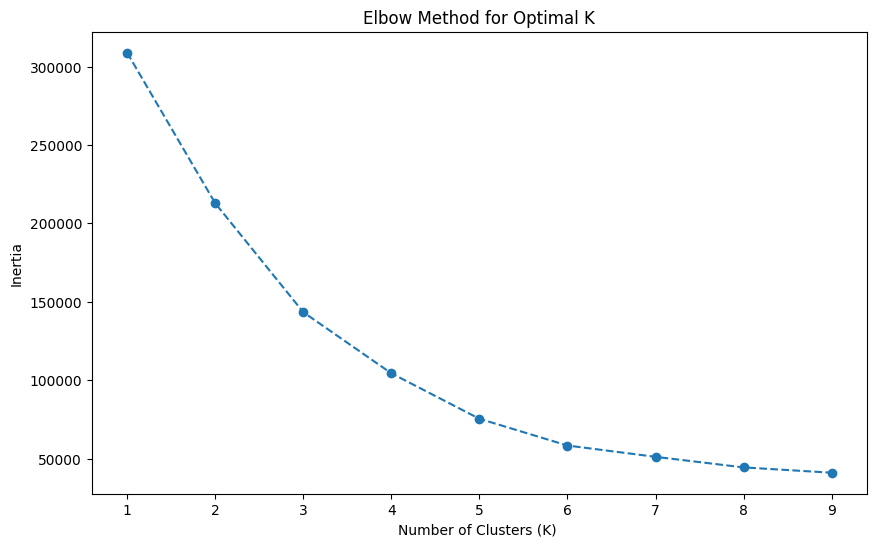

In [8]:
# Mengambil nilai yang akan digunakan untuk clustering
X = df[['Age', 'Annual Income', 'Spending Score']]

# Menentukan jumlah cluster yang dinginkan
max_k = 10
# Jumlah maksimum cluster yang akan diuji
inertia_values = []

# Menghitung inersia untuk setiap nilai K
for k in range(1, max_k):
  kmeans = KMeans(n_clusters=k, random_state=0)
  kmeans.fit(X)
  inertia_values.append(kmeans. inertia_)

# Membuat plot elbow
plt.figure (figsize=(10,6))
plt.plot (range(1, max_k), inertia_values, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K) ')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


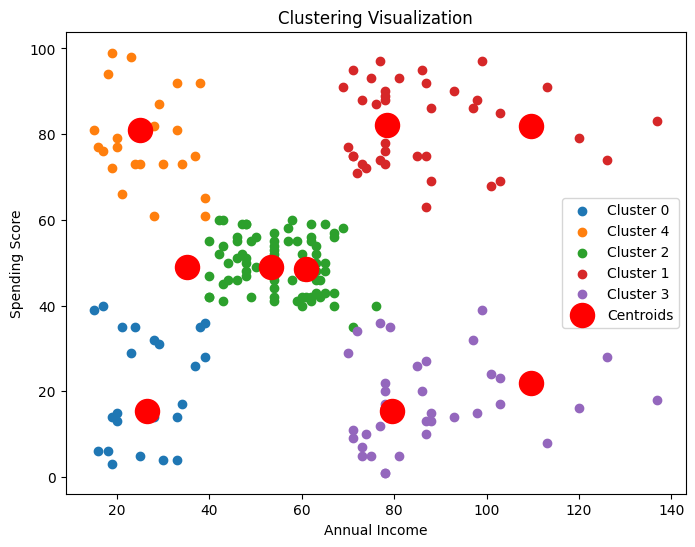

In [9]:
# Tentukan jumlah cluster
n_clusters = 5

# Buat model Means
means = KMeans(n_clusters=n_clusters, random_state=0)

# Lakukan clustering pada data dan tambahkan label ke dataframe
df['label'] = means.fit_predict(X)

# Visualisasikan data berdasarkan label
plt.figure(figsize=(8, 6))
for label in df['label'].unique():
  plt.scatter(df[df['label'] == label]['Annual Income'],
              df[df['label'] == label]['Spending Score'],
              label=f'Cluster {label}')
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2],
            s=300, c='red', label='Centroids')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Clustering Visualization')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


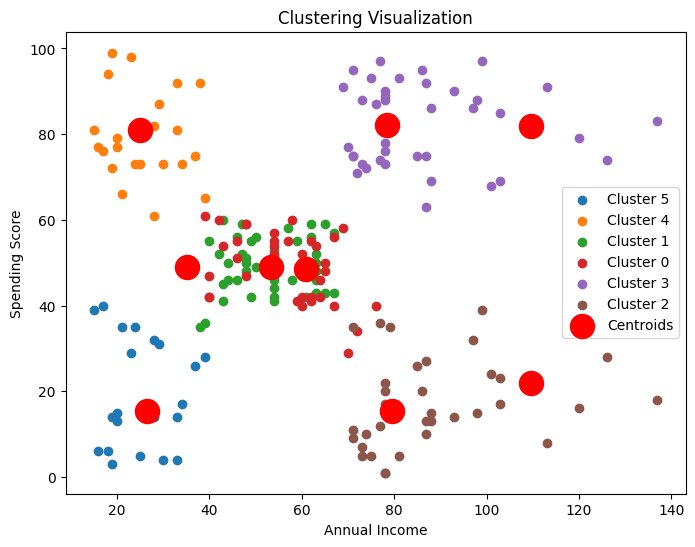

In [10]:
# Tentukan jumlah cluster
n_clusters = 6

# Buat model Means
means = KMeans(n_clusters=n_clusters, random_state=0)

# Lakukan clustering pada data dan tambahkan label ke dataframe
df['label'] = means.fit_predict(X)

# Visualisasikan data berdasarkan label
plt.figure(figsize=(8, 6))
for label in df['label'].unique():
  plt.scatter(df[df['label'] == label]['Annual Income'],
              df[df['label'] == label]['Spending Score'],
              label=f'Cluster {label}')
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2],
            s=300, c='red', label='Centroids')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Clustering Visualization')
plt.legend()
plt.show()

In [11]:
# Inisialisasi dictionary untuk menyimpan nilai silhouette score
silhouette_scores = {}

# Menghitung silhouette score untuk setiap nilai k dari 2 hingga 10
for k in range(2, 11):
  kmeans = KMeans(n_clusters=k, random_state=0)
  labels = kmeans.fit_predict(X)
  silhouette_avg = silhouette_score(X, labels)
  silhouette_scores[k] = silhouette_avg

# Menampilkan nilai silhouette score untuk setiap nilai k
for k, silhouette_avg in silhouette_scores. items():
  print(f"Silhouette Score for k={k}: {silhouette_avg}")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Silhouette Score for k=2: 0.293166070535953
Silhouette Score for k=3: 0.3839349967742105
Silhouette Score for k=4: 0.40546302077733304
Silhouette Score for k=5: 0.44428597560893024
Silhouette Score for k=6: 0.4523443947724053
Silhouette Score for k=7: 0.4412807576186172
Silhouette Score for k=8: 0.4280971079746162
Silhouette Score for k=9: 0.40126260157691634
Silhouette Score for k=10: 0.3790978814868016


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [12]:
# Inisialisasi dictionary untuk menyimpan nilai Davies-Bouldin Index
dbi_scores = {}

# Menghitung Davies-Bouldin Index untuk setiap nilai k dari 2 hingga 10
for k in range(2, 11):
  kmeans = KMeans(n_clusters=k, random_state=0)
  labels = kmeans.fit_predict(X)
  dbi = davies_bouldin_score(X, labels)
  dbi_scores[k] = dbi

# Menampilkan nilai Davies-Bouldin Index untuk setiap nilai k
for k, dbi in dbi_scores.items():
  print(f"Davies-Bouldin Index for k={k}: {dbi}")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Davies-Bouldin Index for k=2: 1.3571023143309133
Davies-Bouldin Index for k=3: 0.8748062648492879
Davies-Bouldin Index for k=4: 0.8914904209843165
Davies-Bouldin Index for k=5: 0.8218781633199781
Davies-Bouldin Index for k=6: 0.746974007275528
Davies-Bouldin Index for k=7: 0.7863764854525301
Davies-Bouldin Index for k=8: 0.8641438876447516
Davies-Bouldin Index for k=9: 0.9070119449899816
Davies-Bouldin Index for k=10: 0.9573604236246045


In [13]:
# Inisialisasi dictionary untuk menyimpan nilai Calinski-Harabasz Index
chi_scores = {}

# Menghitung Calinski-Harabasz Index untuk setiap nilai k dari 2 hingga 10
for k in range(2,11):
  kmeans = KMeans(n_clusters=k, random_state=0)
  labels = kmeans.fit_predict(X)
  chi = calinski_harabasz_score(X, labels)
  chi_scores[k] = chi

# Menampilkan nilai Calinski-Harabasz Index untuk setiap nilai k
for k, chi in chi_scores.items():
  print(f"Calinski-Harabasz Index for k={k}: {chi}")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Calinski-Harabasz Index for k=2: 89.28096999467428
Calinski-Harabasz Index for k=3: 113.70507138642179
Calinski-Harabasz Index for k=4: 127.9838294818919
Calinski-Harabasz Index for k=5: 151.04386000160667
Calinski-Harabasz Index for k=6: 166.7204931788687
Calinski-Harabasz Index for k=7: 162.2852042279988
Calinski-Harabasz Index for k=8: 163.58062876554533
Calinski-Harabasz Index for k=9: 156.15508760692356
Calinski-Harabasz Index for k=10: 152.26426170758603
